# Task 2

## Multi-class Classification

**author:** "Gökberk Abdullah" 

**school number:** "090170341"

**date:** "May 8, 2023"

**Task 2:** Find a data set which is suitable for multi-class (class number is greater than two) classification (there is no limit on the number of features or type of the features). Then, apply K-nearest neighbors algorithm and multinomial regression to this data set to find the best performing model with respect to a classification metric. Explain the reason (give support) why you picked that model as the final one.

#### Instructions to follow:

- Include all your codes here. Be sure that your code is CLEAN, READABLE, and REPRODUCIBLE.
- Put your data set into a **datasets** folder.
- Put your images (if available) into an **images** folder.
- Please return a NICE and CLEAR homework. Otherwise, it will not be graded.
- Please write YOUR OWN code. **DO NOT copy** my codes or someone else's codes.
- Please **DO NOT use** IRIS data set for this task.

## Data Decription

I will reuse the dataset I used in the first question because it consists of useful and numeric data and contains more than 2 classes.

In the above reference, the dataset was created using Portuguese “Vinho Verde” red wine varieties. Inputs include objective tests (eg PH values) and output is based on sensory data. (median of at least 3 reviews by wine experts). Each expert rated the wine quality from 0 (very poor) to 10 (very excellent). Due to privacy and logistical issues, only physicochemical (inputs) and sensory (output) variables are available (e.g. no data on grape types, wine brand, wine selling price, etc.).

### List and Description of Data

Inputs (based on physicochemical tests):

* fixed acidity: most wine-related acids are stable and non-volatile (does not evaporate easily).

* volatile acidity: the amount of acetic acid in wine, which at very high levels can cause an unpleasant vinegar flavor.

* citric acid: small amounts of citric acid can add 'freshness' and flavor to wines.

* residual sugar: amount of sugar remaining after fermentation has stopped, less than 1 gram/liter of wine is rare to find and wines over 45 grams/liter are considered sweet.

* chlorides: the amount of salt in the wine.

* free sulfur dioxide: The free form of SO2 is in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; prevents microbial growth and oxidation of wine.

* total sulfur dioxide: the amount of free and bound forms of SO2 at low concentrations; SO2 is mostly undetectable in wine, but at concentrations of free SO2 above 50 ppm, SO2 becomes evident in the nose and flavor of the wine.

* density: The density of water is close to water, based on percent alcohol and sugar content.

* pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3–4 on the pH scale.

* sulphates: A wine additive that can contribute to levels of sulfur dioxide gas (SO2), acting as an antimicrobial and antioxidant

* alcohol: percent alcohol content of wine

Output (based on sensory data):

* quality (score from 0 to 10)

You can find the source of the data on [this](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) site.

First, let's import the necessary libraries and load our dataset.

In [37]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
file_path = os.path.join("datasets", "winequality-red.csv")

df = pd.read_csv(file_path)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Let's observe with `plot.barh()` that it contains various numbers of labeled data from 3 to 8.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

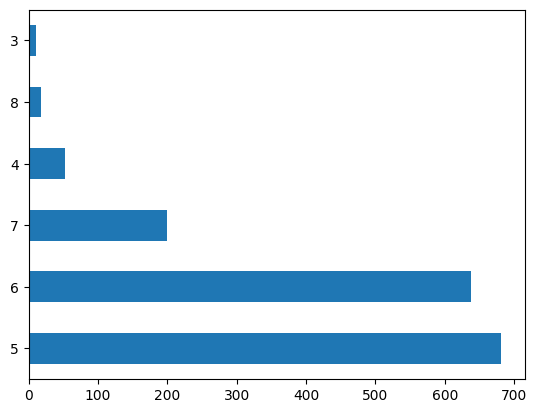

In [3]:
df["quality"].value_counts().plot.barh();
df["quality"].value_counts()

We get general information with the `info()` function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All of the independent variables are of float type and we can get more detailed information with the `describe()` function.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


There are no missing values.

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Classifier Implementation

### KNeighborsClassifier

Let's divide our data into train and test.

Thanks to the `stratify` parameter, `X_test` and `X_train` will contain all target class in the same ratio.

In [7]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Next, let's create a pipeline combining standardization and KNeighborsClassifier using the `make_pipeline()` function and,

Let's find the optimal parameter values ​​using the `GridSearchCV()` function. This function will try a number of different combinations of hyperparameter values ​​to determine the parameters that give the best performance.

In [28]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
params = {
    'kneighborsclassifier__n_neighbors': range(2, y.nunique()),
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__metric': ['minkowski', 'euclidean', 'manhattan']
}
grid = GridSearchCV(pipe, params, cv=5)

In [29]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__metric': ['minkowski',
                                                          'euclidean',
                                                          'manhattan'],
                         'kneighborsclassifier__n_neighbors': range(2, 6),
                         'kneighborsclassifier__p': [1, 2]})

We can access the best parameter values ​​using `best_params_` and the best score using `best_score_`.

In [30]:
print("Best parameters: ", grid.best_params_)
print("Best scores: ", grid.best_score_)

Best parameters:  {'kneighborsclassifier__metric': 'minkowski', 'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__p': 2}
Best scores:  0.579344362745098


Let's apply the best parameters:

The `grid.best_score_` value is the best average accuracy value obtained during the cross-validation process. This value is obtained as a result of dividing the training data into different parts and training and validating the model sequentially on each part, and reflects the performance of the model in general.

The `accuracy_score` shows the correct classification rate of the model over all of the training data. Therefore, `grid.best_score_` and accuracy_score may give different values. `grid.best_score_` gives the average of the correct classification rates, while `accuracy_score` gives the correct classification rate only once.

I will talk about the scores last.

In [31]:
pipe_final = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2))
pipe_final.fit(X_train,y_train)
y_pred = pipe_final.predict(X_test)
print("Accuracy for test set:", accuracy_score(y_test, y_pred))

y_pred_train = pipe_final.predict(X_train)
print("Accuracy for train set:", accuracy_score(y_train, y_pred_train))


Accuracy for test set: 0.58125
Accuracy for train set: 0.7357310398749023


Let's take a look at the confusion matrix and classification report.

In [41]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 0  0  0  2  0  0]
 [ 0  1  7  3  0  0]
 [ 0  3 95 35  3  0]
 [ 1  1 41 72 13  0]
 [ 0  0  5 17 18  0]
 [ 0  0  0  1  2  0]]


In [42]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.20      0.09      0.13        11
           5       0.64      0.70      0.67       136
           6       0.55      0.56      0.56       128
           7       0.50      0.45      0.47        40
           8       0.00      0.00      0.00         3

    accuracy                           0.58       320
   macro avg       0.32      0.30      0.30       320
weighted avg       0.56      0.58      0.57       320



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Multinomial Regression

Multinomial regression is a regression method used in a classification problem with many classes. This method models the relationship between a dependent variable with multiple classes and one or more independent variables. Multinomial regression is an extension of logistic regression to multi-class classification problems. That is, logistic regression is used for two-class classification problems, while multinomial regression is used for multi-class classification problems. For this we need to set `multi_class='multinomial'`.


In [38]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Next, let's create a pipeline combining standardization and LogisticRegression using the `make_pipeline()` function and,

Let's find the optimal parameter values ​​using the `GridSearchCV()` function. This function will try a number of different combinations of hyperparameter values ​​to determine the parameters that give the best performance.

In [39]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial'))

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'saga', 'lbfgs'],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
    'logisticregression__l1_ratio': [0, 0.5, 1],
    'logisticregression__max_iter': [100, 1000, 10000],
}

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio paramet

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(multi_class='multinomial'))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__l1_ratio': [0, 0.5, 1],
                         'logisticregression__max_iter': [100, 1000, 10000],
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet'],
                         'logisticregression__solver': ['liblinear', 'saga',
                                                        'lbfgs']})

We can access the best parameter values ​​using `best_params_` and the best score using `best_score_`.

In [40]:
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best parameters:  {'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
Best score:  0.6012377450980393


Let's apply the best parameters:

The `grid.best_score_` value is the best average accuracy value obtained during the cross-validation process. This value is obtained as a result of dividing the training data into different parts and training and validating the model sequentially on each part, and reflects the performance of the model in general.

The `accuracy_score` shows the correct classification rate of the model over all of the training data. Therefore, `grid.best_score_` and accuracy_score may give different values. `grid.best_score_` gives the average of the correct classification rates, while `accuracy_score` gives the correct classification rate only once.

In [48]:
pipe_final = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial',C=0.1,max_iter=100,penalty='l2',solver='saga'))
pipe_final.fit(X_train,y_train)
y_pred = pipe_final.predict(X_test)
print("Accuracy for test set:", accuracy_score(y_test, y_pred))

y_pred_train = pipe_final.predict(X_train)
print("Accuracy for train set:", accuracy_score(y_train, y_pred_train))

Accuracy for test set: 0.596875
Accuracy for train set: 0.6184519155590305


c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Let's take a look at the confusion matrix and classification report.

In [46]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[  0   0   1   1   0   0]
 [  0   0  10   1   0   0]
 [  0   0 100  35   1   0]
 [  0   0  46  81   1   0]
 [  0   0   2  28  10   0]
 [  0   0   0   2   1   0]]


In [47]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.63      0.74      0.68       136
           6       0.55      0.63      0.59       128
           7       0.77      0.25      0.38        40
           8       0.00      0.00      0.00         3

    accuracy                           0.60       320
   macro avg       0.32      0.27      0.27       320
weighted avg       0.58      0.60      0.57       320



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusion

Choosing can be difficult as both models perform poorly in terms of classification performance. However, when we compare it, it is seen that the `LogisticRegression` model gives better results than the `KNeighborsClassifier` model. The LogisticRegression model gave a better result in the test set than the `KNeighborsClassifier` model.

Also, the high accuracy value in the train set may indicate that the `KNeighborsClassifier` model may have overfitted. Therefore, it can be said that the `LogisticRegression` model has a more balanced performance. However, it would be the most correct interpretation to say that this data set does not have enough data for multiple classification.